1\. **Reductions**

Find the total mean, and the mean for each row and column of the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [1]:
import numpy as np


m = np.arange(12).reshape((3,4))

print(f" The original matrix is : \n {m}")                  
print(f" The mean of the matrix is : {np.mean(m)}")       
print(f" Mean value of each row is : {np.mean(m, axis=0)}")
print(f"Mean value of each column is : {np.mean(m, axis=1)}")

 The original matrix is : 
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
 The mean of the matrix is : 5.5
 Mean value of each row is : [4. 5. 6. 7.]
Mean value of each column is : [1.5 5.5 9.5]


2\. **Outer product**

Find the outer product of the following vectors:

```python
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
```

Use different methods to do this:

   1. Using the function `outer` in numpy
   2. Using a nested `for` loop or a list comprehension
   3. Using numpy broadcasting operations

In [2]:
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])

print("By using the outer function:")
print(np.outer(u,v))

print("By using the for loop:")
outer_product = np.empty((len(u), len(v)), dtype=int)
for i in range(len(u)):
    for j in range(len(v)):
        outer_product[i, j] = u[i]*v[j]
print(outer_product)

print("By broadcasting:")
print(u[:, np.newaxis] * v)

By using the outer function:
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
By using the for loop:
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
By broadcasting:
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. **Matrix masking**

Create a 10 by 6 matrix of float random numbers, distributed between 0 and 3 according to a flat distribution.

After creating the matrix, set all entries $< 0.3$ to zero using a mask.

In [3]:
n = np.random.uniform(low=0, high=3, size=(10,6))
n[n<0.3] = 0  # Masking opertaion to get the values
print(n)

[[0.         1.82963676 1.27925993 1.12948095 1.63344081 2.09526984]
 [2.55617068 0.         2.46239429 0.62555717 1.9764996  2.64750337]
 [0.52944668 1.26006358 2.99803363 2.46311814 2.86091707 2.02640034]
 [0.         1.58058464 2.1947304  0.5461386  1.36226434 2.79611072]
 [2.17087681 2.33026643 2.09094878 0.53243535 0.6288332  2.24045367]
 [2.34508088 1.54139624 0.88921106 2.90641818 1.26534764 0.81347122]
 [2.98596944 2.81446273 0.98158047 2.50083656 0.         1.2617866 ]
 [1.32276804 1.46375009 0.54545478 2.80311843 2.29391435 0.58155622]
 [2.89867261 1.88239302 1.29317621 0.         0.49583363 0.4052205 ]
 [2.82298132 2.16573501 1.73231009 2.87315227 0.85409432 0.37778295]]


4\. **Trigonometric functions**

Use `np.linspace` to create an array of 100 numbers between $0$ and $2\pi$ (inclusive).

  * Extract every 10th element using the slice notation
  * Reverse the array using the slice notation
  * Extract elements where the absolute difference between the `sin` and `cos` functions evaluated for that element is $< 0.1$
  * **Optional**: make a plot showing the sin and cos functions and indicate where they are close

Array has been created: 
  [0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.5

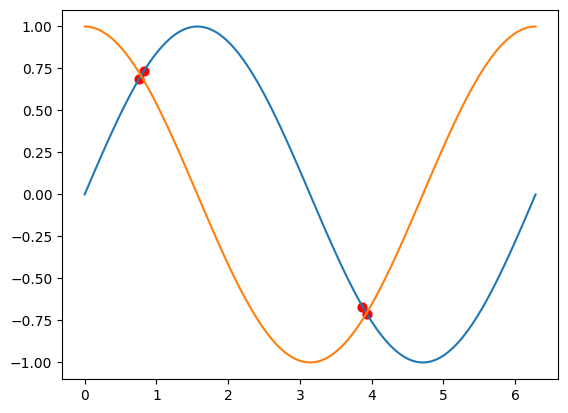

In [4]:
import math
import matplotlib.pyplot as plt

arr = np.linspace(0, 2*math.pi, 100)
print("Array has been created: \n ",arr)
sliced_arr = arr[9::10]
print("Every 10th array: \n ",sliced_arr)
reversed_arr = sliced_arr[::-1]
print("Reversed array: \n ",reversed_arr)

sincos_arr = []
for i in range(len(arr)):
    if abs((np.sin(arr[i]) - np.cos(arr[i]))) < 0.1:
        sincos_arr.append(arr[i])
print("Sincos difference array: \n ",sincos_arr)

y = np.sin(arr)
z = np.cos(arr)
h = np.sin(sincos_arr)
plt.plot(arr,y,arr,z)
plt.scatter(sincos_arr,h, color='red', s=40, marker='o')
plt.show()

5\. **Matrices**

Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anti-diagonal matrix (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagonal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [5]:
x = [[i*j for j in range(1,11)] for i in range(1,11)]    # Matrix has been created 
y = np.array(x).reshape(10,10)
print("10 by 10 multiplication table: \n", y)
print("Trace of the matrix: ",np.sum(np.diag(x)))

rev_y = np.fliplr(y)
print("Anti-diagonal matrix: ",np.diag(rev_y))
print("Diagonal offset by 1 upwards: ",np.diag(y,1))

10 by 10 multiplication table: 
 [[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
Trace of the matrix:  385
Anti-diagonal matrix:  [10 18 24 28 30 30 28 24 18 10]
Diagonal offset by 1 upwards:  [ 2  6 12 20 30 42 56 72 90]


6\. **Broadcasting**

Use broadcasting to create a grid of distances.

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles.

The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Build a 2D grid of distances among each city along Route 66
  * Convert the distances in km

In [6]:
miles= np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
x =  miles[np.newaxis, :]
y =  miles[:, np.newaxis]
a = x - y
print(a)

km = 1.609344
dist_km = km * a
print(f" In km:\n {dist_km}")

[[    0   198   303   736   871  1175  1475  1544  1913  2448]
 [ -198     0   105   538   673   977  1277  1346  1715  2250]
 [ -303  -105     0   433   568   872  1172  1241  1610  2145]
 [ -736  -538  -433     0   135   439   739   808  1177  1712]
 [ -871  -673  -568  -135     0   304   604   673  1042  1577]
 [-1175  -977  -872  -439  -304     0   300   369   738  1273]
 [-1475 -1277 -1172  -739  -604  -300     0    69   438   973]
 [-1544 -1346 -1241  -808  -673  -369   -69     0   369   904]
 [-1913 -1715 -1610 -1177 -1042  -738  -438  -369     0   535]
 [-2448 -2250 -2145 -1712 -1577 -1273  -973  -904  -535     0]]
 In km:
 [[    0.         318.650112   487.631232  1184.477184  1401.738624
   1890.9792    2373.7824    2484.827136  3078.675072  3939.674112]
 [ -318.650112     0.         168.98112    865.827072  1083.088512
   1572.329088  2055.132288  2166.177024  2760.02496   3621.024   ]
 [ -487.631232  -168.98112      0.         696.845952   914.107392
   1403.347968  1886.15

7\. **Prime numbers sieve**

Compute the prime numbers in the 0-N (start with N=99) range with a sieve (mask).

  * Constract a shape (N,) boolean array, which is the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (with `timeit`); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [7]:
def sieve(N):                         # Created sieve function
    mask = np.ones(N, dtype=bool)     
    mask[:2] = False
    for i in range(2, N):
        mask[2*i::i] = False
    return np.arange(N)[mask]
N=100
print(sieve(N))
#%timeit sieve(N)

def sieve_er(N):
    mask = np.ones(N, dtype=bool)
    mask[:2] = False
    p = 2
    while (p * p <= N):
        if (mask[p] == True):
            for i in range(p * p, N, p):
                mask[i] = False
        p += 1
    return np.arange(N)[mask]
print(sieve_er(N))

#%timeit sieve_er(N)]



[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]


8\. **Diffusion using random walk**

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of many random walkers after a given amount of time.

*Hint*: create a 2D array where each row represents a walker, and each column represents a time step.

  * Take 1000 walkers and let them walk for 200 steps
  * Use `randint` to create a 2D array of size $walkers \times steps$ with values -1 or 1
  * Calculate the walking distances for each walker (e.g. by summing the elements in each row)
  * Take the square of the previously-obtained array (element-wise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * **Optional**: plot the average distances ($\sqrt(distance^2)$) as a function of time (step)

Walktab: 
 [[ 1  1 -1 ...  1  1  1]
 [-1  1 -1 ...  1  1 -1]
 [-1 -1 -1 ... -1  1 -1]
 ...
 [-1 -1 -1 ... -1  1 -1]
 [ 1 -1 -1 ... -1 -1  1]
 [-1 -1 -1 ...  1 -1 -1]]
Steps sum: 
 [[  1   2   1 ...  -4  -3  -2]
 [ -1   0  -1 ...  16  17  16]
 [ -1  -2  -3 ... -20 -19 -20]
 ...
 [ -1  -2  -3 ... -22 -21 -22]
 [  1   0  -1 ...   6   5   6]
 [ -1  -2  -3 ...  -4  -5  -6]]
Square of steps sum: 
 [[  1   4   1 ...  16   9   4]
 [  1   0   1 ... 256 289 256]
 [  1   4   9 ... 400 361 400]
 ...
 [  1   4   9 ... 484 441 484]
 [  1   0   1 ...  36  25  36]
 [  1   4   9 ...  16  25  36]]
Mean of of the squared distances at each step: 
 [  1.      2.044   3.032   4.052   5.24    6.264   7.312   8.296   9.496
  10.036  11.184  12.528  13.832  15.256  16.352  17.264  18.416  19.58
  20.848  21.9    22.92   24.576  25.496  26.024  27.064  27.912  28.984
  29.428  29.952  30.916  31.68   32.188  33.264  34.168  35.192  36.164
  37.704  38.916  39.968  40.7    40.784  42.284  42.608  43.216  43.824


Text(0, 0.5, 'Average Distance')

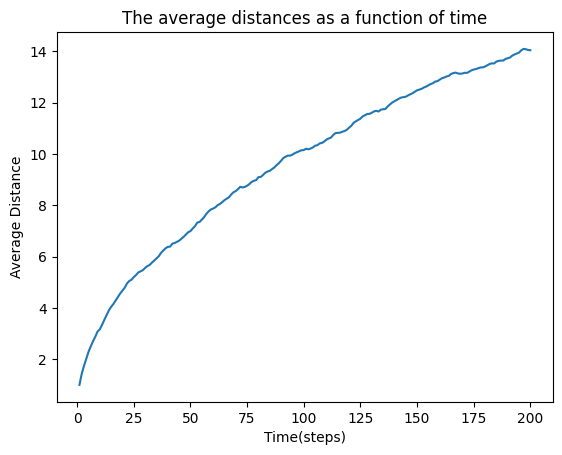

In [8]:
walkers = 1000
steps = 200
walktab = np.random.randint(low=0, high=2, size=(1000,200))
walktab[walktab==0]=-1
print("Walktab: \n",walktab)

distances = walktab.cumsum(axis=1)
print("Steps sum: \n",distances)

sqr = np.square(distances)
print("Square of steps sum: \n", sqr)

arrmean=np.mean(sqr,axis=0)
print("Mean of of the squared distances at each step: \n", arrmean)


sqrrt = np.sqrt(arrmean)
plt.plot(np.arange(1,201),sqrrt)
plt.title('The average distances as a function of time')
plt.xlabel('Time(steps)')
plt.ylabel('Average Distance')